Problem Statement:- The model looks at customer instagram and facebook images and classifies what fashion category they are wearing. The virtual Assistant can help the retailer detect and forecast fahion trends and lauch targetted marketing campaigns. In this project fashion MNIST dataset is used and a deep learning network is prepared to classify the images into 10 classes.
Here we have a dataset of just grayscale images, so a much easier problem. Amazon Echo Look Style Assistant is an application of this.

Objective:- Suppose a customer likes particluar type of dress, so we can do targetted marketing to that specific customer. targetted marketing helps us to attract more customers thus increasing sales and profits of the retailer, that obviously he wants to maximize. 

Fashion Class contains 70000 images;
    1. 60000 for training
    2. 10000 for testing
Images are 28*28 grayscale images.
Each image is represented by a single row in the dataset with 28*28 = 784 pixel values present in the 784 columns.

The 10 target classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

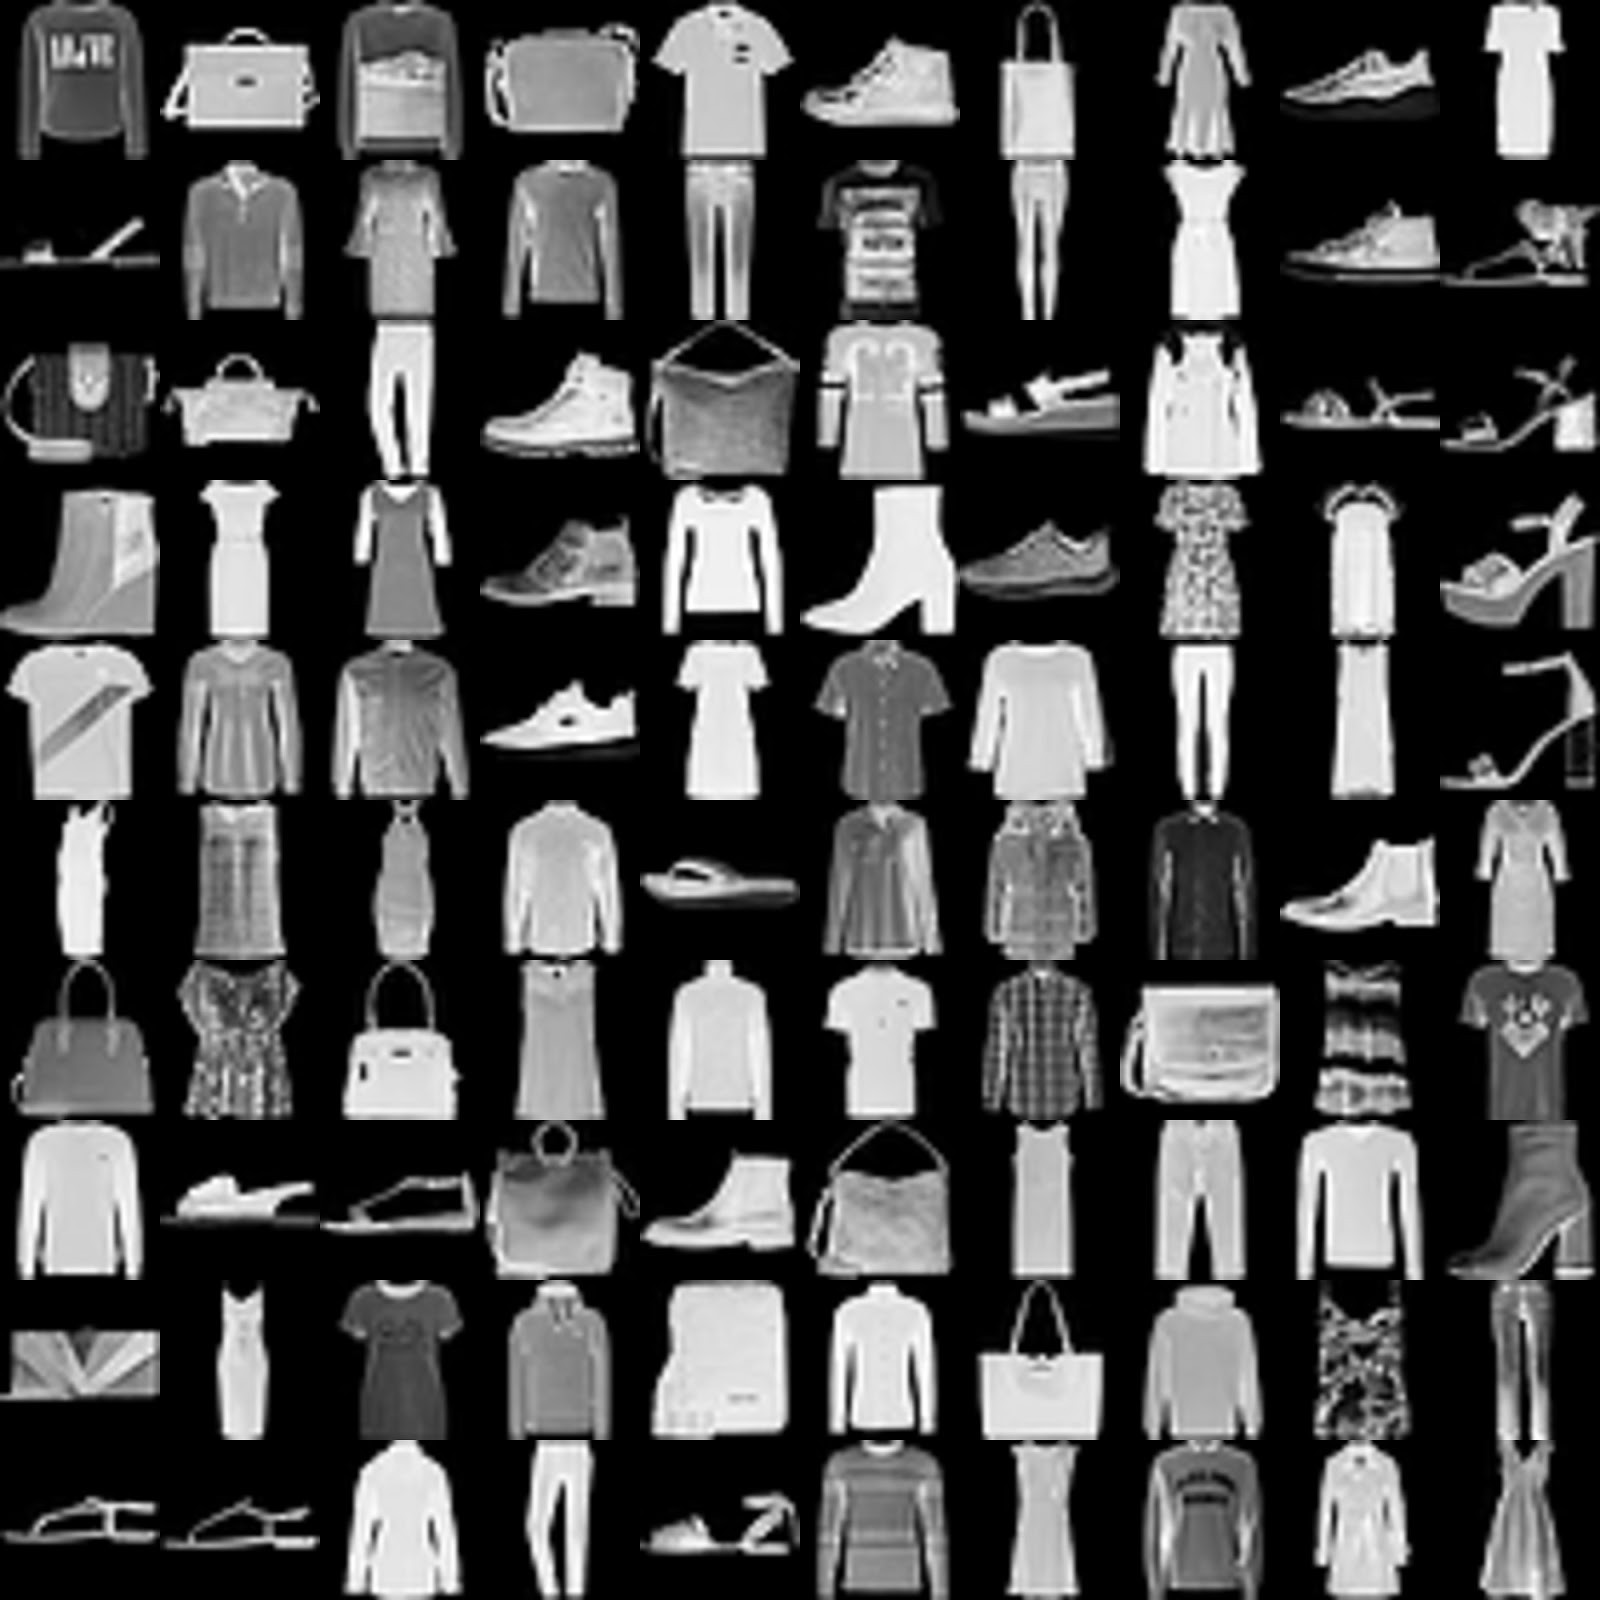

In [1]:
from IPython.display import Image
Image("Fashion.jpeg", width=500, height=500)


# DATA PREPROCESSING

## Step 1:- Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random

## Step 2:- Importing dataset

In [3]:
training_set=pd.read_csv("fashion-mnist_train.csv")
test_set=pd.read_csv("fashion-mnist_test.csv")

In [4]:
training_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [8]:
training_set.shape

(60000, 785)

In [9]:
test_set.shape

(10000, 785)

In [10]:
# Create training and testing arrays(since working with arrays preferrable rather than dataframe)
training = np.array(training_set, dtype = 'float32')
test = np.array(test_set, dtype='float32')

In [11]:
len(training)

60000

In [12]:
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Step 3:- Visualization of the dataset

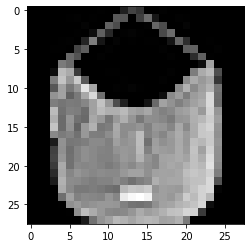

In [13]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape(28,28) , cmap = 'gray') # reshape and plot the image
# remember:- The 10 target classes are as follows:  
#    0 => T-shirt/top
#    1 => Trouser
#    2 => Pullover
#    3 => Dress
#    4 => Coat
#    5 => Sandal
#    6 => Shirt
#    7 => Sneaker
#    8 => Bag
#    9 => Ankle boot

In [14]:
label=training[i,0]
label

8.0

In [15]:
# lets visualize the first 5 fashion class of the training dataset and see if it matches or not
training[0:5,0]

array([2., 9., 6., 0., 3.], dtype=float32)

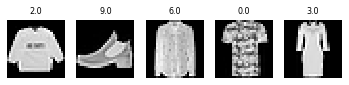

In [16]:
_,axes=plt.subplots(1,5)
for i in range(0,5):
    axes[i].imshow( training[i,1:].reshape(28,28) , cmap = 'gray')
    axes[i].set_title(training[i,0], fontsize = 8)
    axes[i].axis('off')
#    0 => T-shirt/top
#    1 => Trouser
#    2 => Pullover
#    3 => Dress
#    4 => Coat
#    5 => Sandal
#    6 => Shirt
#    7 => Sneaker
#    8 => Bag
#    9 => Ankle boot

## Step 4:- Feature Scaling

In [17]:
x_train=training[:,1:]/255 #Feature scaling 
y_train=training[:,0]

In [18]:
x_test=test[:,1:]/255 #Feature Scaling
y_test=test[:,0]

## Step 5:- Splitting the data into training and validation dataset

In [19]:
# Just to check the results on the training data before checking on test set
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(x_train , y_train , test_size=0.2 , random_state=42)

In [20]:
x_train.shape

(48000, 784)

In [21]:
x_validate.shape

(12000, 784)

In [22]:
y_train.shape

(48000,)

In [23]:
y_validate.shape

(12000,)

## Step 6:- Preparing the data for the convolutional neural network

In [24]:
# * unpack the tuple
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28, 28, 1))

In [25]:
x_train.shape

(48000, 28, 28, 1)

In [26]:
x_test.shape

(10000, 28, 28, 1)

In [27]:
x_validate.shape

(12000, 28, 28, 1)

# BUILDING THE CNN

## Step 1:- Import the keras libraries for CNN

In [28]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


## Step 2:- Initialising the CNN

In [29]:
classifier=Sequential()

## Step 3:-  Prepare the Convolution Layer

In [30]:
classifier.add(Convolution2D(32,3,3,input_shape=(28,28,1),activation='relu'))

c:\users\millend\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


## Step 4:- Max-Pooling

In [31]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [32]:
# Dropout Regularization:-
classifier.add(Dropout(0.2)) # 20% dropping rate of the neurons while training forward

## Step 5:- Flattening

In [33]:
classifier.add(Flatten())

## Step 6:- Full Connection 

In [34]:
classifier.add(Dense(output_dim=56, activation='relu'))
classifier.add(Dense(output_dim=10, activation='sigmoid'))

c:\users\millend\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=56)`
  """Entry point for launching an IPython kernel.
c:\users\millend\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


## Step 7:- Compiling the CNN

In [35]:
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# FITTING CNN TO THE IMAGES

In [36]:
classifier.fit(x_train,
               y_train,
               batch_size = 512,
               nb_epoch = 50,
               verbose = 1,
               validation_data = (x_validate, y_validate))

c:\users\millend\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 28s 592us/step - loss: 0.7874 - accuracy: 0.7348 - val_loss: 0.4841 - val_accuracy: 0.8257
Epoch 2/50
48000/48000 [==============================] - 25s 531us/step - loss: 0.4552 - accuracy: 0.8389 - val_loss: 0.4255 - val_accuracy: 0.8464
Epoch 3/50
48000/48000 [==============================] - 25s 529us/step - loss: 0.4017 - accuracy: 0.8586 - val_loss: 0.3969 - val_accuracy: 0.8593
Epoch 4/50
48000/48000 [==============================] - 24s 491us/step - loss: 0.3696 - accuracy: 0.8702 - val_loss: 0.3635 - val_accuracy: 0.8699
Epoch 5/50
48000/48000 [==============================] - 24s 497us/step - loss: 0.3488 - accuracy: 0.8764 - val_loss: 0.3442 - val_accuracy: 0.8796
Epoch 6/50
48000/48000 [==============================] - 24s 494us/step - loss: 0.3279 - accuracy: 0.8853 - val_loss: 0.3294 - val_accuracy: 0.8839
Epoch 7/50
48000/48000 [==============================] 

Accuracy on the train set = 98%, Accuracy on the validation set = 91% (before regularization)
Accuracy on the train set = 95%, Accuracy on the validation set = 91% (after regularization)

# PREDICTING THE TEST SET RESULTS

In [37]:
# Predict the test set results
y_pred = classifier.predict_classes(x_test)
y_pred

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

# VISUALIZING THE TEST SET RESULTS

In [38]:
y_pred

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [39]:
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

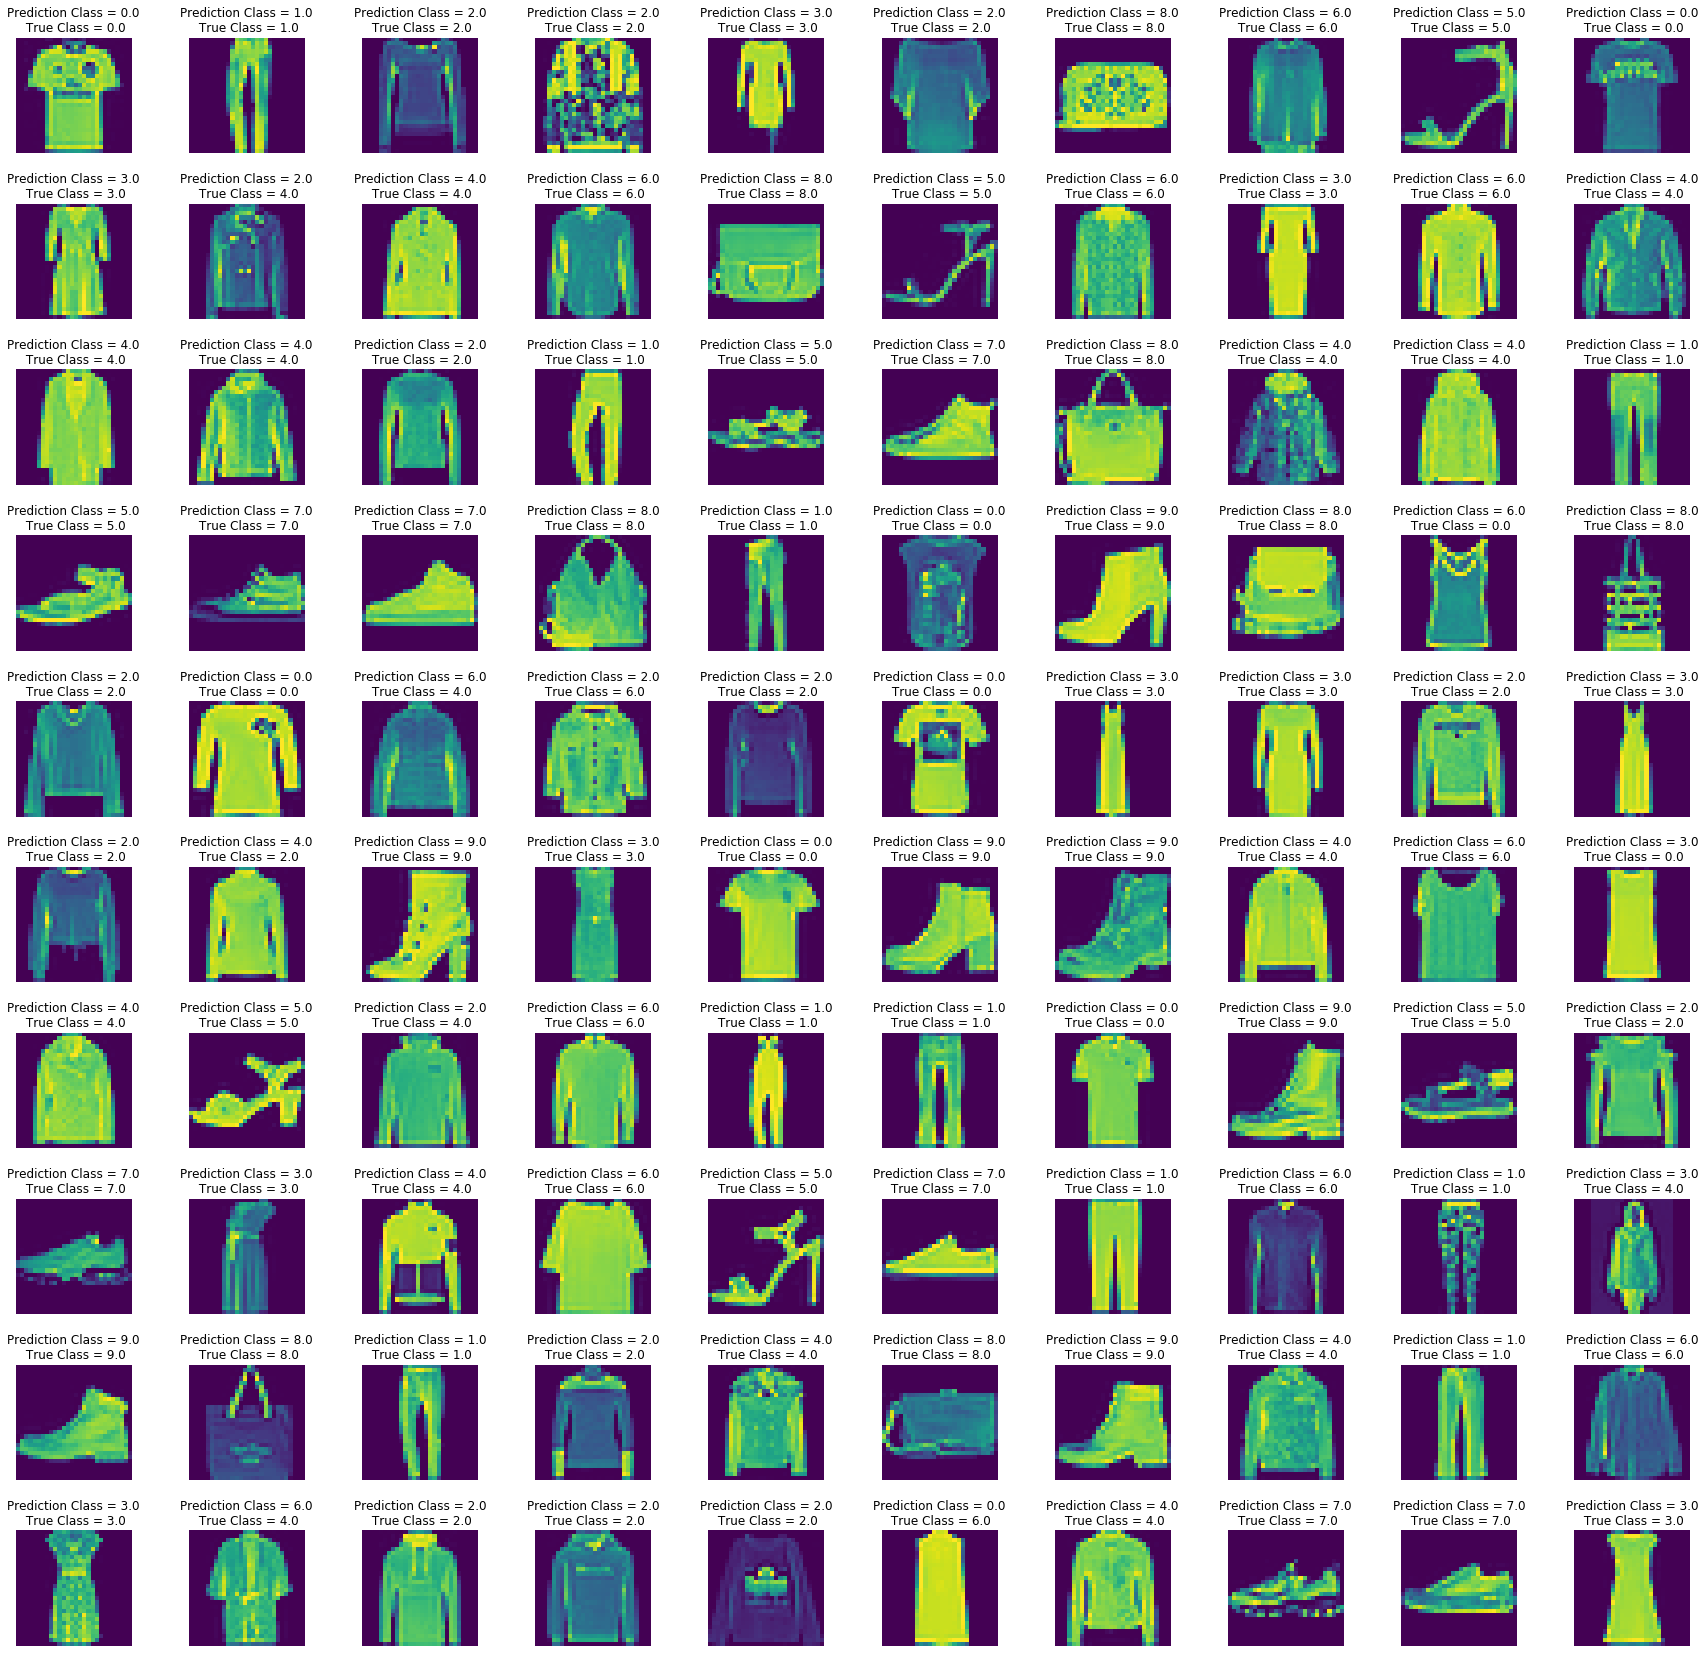

In [40]:
#visualizing the first 100 images of the test set
_, axes = plt.subplots(10, 10, figsize = (30,30))
axes = axes.ravel()

for i in np.arange(0, 100):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(y_pred[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
# remember:- The 10 target classes are as follows:  
#    0 => T-shirt/top
#    1 => Trouser
#    2 => Pullover
#    3 => Dress
#    4 => Coat
#    5 => Sandal
#    6 => Shirt
#    7 => Sneaker
#    8 => Bag
#    9 => Ankle boot

# EVALUATING THE MODEL PERFORMANCE

The more the train set accuarcy is near to the test set accuracy, better is the model, since enables us to reduce the factor of overfitting

## Method 1:- Evaluate through "evaluate function of Sequential Module"

In [41]:
evaluation = classifier.evaluate(x_test, y_test)
evaluation

10000/10000 [==============================] - 2s 175us/step


[0.24854950042366983, 0.9176999926567078]

In [42]:
# Accuracy on the test set
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

Test Accuracy : 0.918


## Method 2:- Evaluate through "Confusion Matrix"

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[835,   2,  19,  18,   2,   0, 116,   1,   7,   0],
       [  0, 991,   2,   5,   0,   0,   1,   0,   1,   0],
       [ 13,   1, 875,  15,  34,   0,  61,   0,   1,   0],
       [ 12,   9,   6, 935,  11,   0,  25,   0,   2,   0],
       [  0,   1,  51,  27, 844,   0,  76,   0,   1,   0],
       [  0,   1,   0,   0,   0, 969,   1,  15,   2,  12],
       [ 82,   1,  47,  24,  29,   0, 815,   0,   2,   0],
       [  0,   0,   0,   0,   0,   2,   0, 969,   0,  29],
       [  4,   2,   4,   0,   1,   3,  11,   1, 973,   1],
       [  0,   0,   0,   0,   0,   3,   0,  26,   0, 971]], dtype=int64)

## Method 3:- Evaluate through "Classification Report"

In [44]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_test, y_pred, target_names = target_names))
# remember:- The 10 target classes are as follows:  
#    0 => T-shirt/top
#    1 => Trouser
#    2 => Pullover
#    3 => Dress
#    4 => Coat
#    5 => Sandal
#    6 => Shirt
#    7 => Sneaker
#    8 => Bag
#    9 => Ankle boot

              precision    recall  f1-score   support

     Class 0       0.88      0.83      0.86      1000
     Class 1       0.98      0.99      0.99      1000
     Class 2       0.87      0.88      0.87      1000
     Class 3       0.91      0.94      0.92      1000
     Class 4       0.92      0.84      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.74      0.81      0.77      1000
     Class 7       0.96      0.97      0.96      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# IMPROVEMENT IN THE MODEL

This can be done by 4 ways:-
    
    1> Add more feature detectors or filters. Can be included while adding the Convolution layer. Here 32 used since working on CPU, If GPU available can increase it to 64.
    
    2> Add one more convolutional layer with max pooling after the first pooling step and before the flattening step.
    
    3> Add some more fully connected layers
    
    4> Add dropout regularization technique. Dropout refers to the dropping out of units in the neural network which has the least co-dependency, therefore renoving the problem of overfitting. Hence used here.
    
    5> Use gridsearchCV for parameter tuning.

# CONCLUSION

It could be seen clearly that other than classes 0,2,6 the model prediction precision was over 90%. But the model predicts the above mentioned classes poorly witha precision of 88%, 87% and 74% respectively. If we have a look at what those classes represent, they are:- Tshirt/top, pullover, shirt. To classify this even humans face problem most of the times, so does this model face and hence it's totally genuine and correct to get a less precision score on these classes.